In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

sys.path.append(os.path.abspath("../../utilities/J"))
from J_bspline_bspline import J

In [3]:
N = 5 # runs
Kx_family = 'b-spline'
Kb_family = 'b-spline'
Kx_order = 0
Kb_order = 3
Kx = [[10]]
Kb = [[2]]
Ky = 3
Sigma_decay = 0
epochs = 10

In [4]:
J_cb = J(Kx_order, Kx[0][0]+1, Kb_order, Kb[0][0])

In [5]:
model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay, J_cb=J_cb)

In [6]:
cordex = CordexContinuous(model=model, runs=N)

In [7]:
best_design, best_obj = cordex.optimize(epochs=epochs, refinement_epochs=1)

100%|██████████| 1/1 [00:00<00:00, 86.13it/s]


In [41]:
print(f'Best objective value (A): {np.round(best_obj,2)}')

Best objective value (A): 66.45


AttributeError: 'NoneType' object has no attribute 'write'

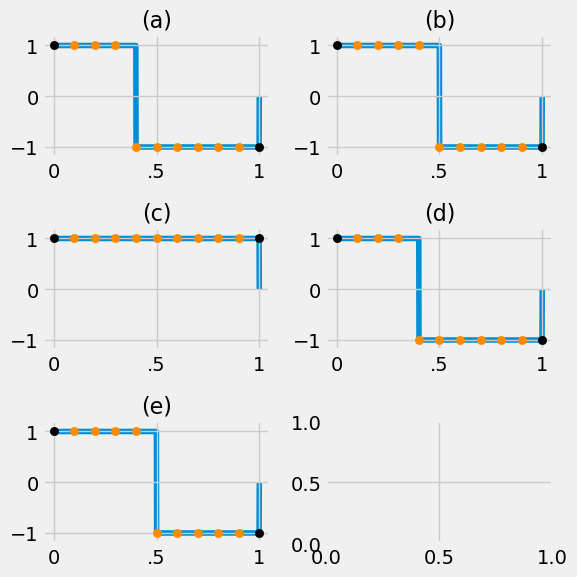

In [45]:
subplot_b_spline_results(3, 2, np.linspace(0,1,1000), best_design, Kx_order)

In [47]:
print(best_design)

[[ 1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]]
